In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
sns.set_style('darkgrid')
from scipy.stats import pearsonr
%matplotlib inline

In [3]:
iris = pd.read_csv("/Users/aleksandr/Downloads/iris.csv")

In [8]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [9]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [10]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
print(len(iris))
print(iris.shape)
print('Колличество пустых ячеек: {}'.format(iris.isnull().sum().sum()))

150
(150, 5)
Колличество пустых ячеек: 0


Мы хотим предсказать к какому классу относится цветок по 4 параметрам. Всего 3 класса. С какой-то вероятностью новый цветок, которого нет в датасете, будет относится к одному из 4ых цветков.

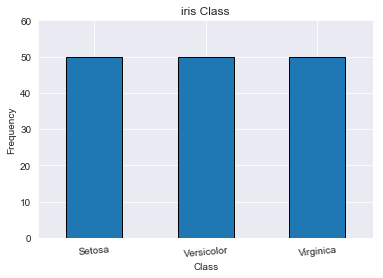

In [29]:
LABELS = ["Setosa", "Versicolor", 'Virginica']
count_classes = pd.value_counts(iris['variety'], sort = True)
count_classes.plot(kind = 'bar', rot=5, edgecolor='black')
plt.title("iris Class")
plt.xticks(range(3), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.ylim((0, 60))
plt.show()

In [25]:
print(len((iris[iris['variety']=='Setosa'])))
print(len(iris[iris['variety']=='Versicolor']))
print(len(iris[iris['variety']=='Virginica']))

50
50
50


По данному dataset можно сделать вывод:
- в ds присутствует проблема классификации
- данные хорошо распределеные, из 150 значений каждый класс имеет 1/3 данных
- выбросов в данных нет

Поправим корректные название колонок в ds

In [36]:
# [sepal.length, sepal.width, petal.length, petal.width, variety]
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [37]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Один из наилучший вариант для данного ds применить метод Логистическая регрессия
- данные распределены в равном колличестве по классам
- в ds имеется проблема классификации

Создаем вектора на основе ds вектора x и y
- X - это числа которые принимают длину и ширину чешилистника для цветка
- y - это вектор для каждого класса (выдвет цифру класса от 0 до 2)

In [38]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X, y = load_iris(return_X_y=True)

Разделим датасет на тренировочные данные и на тестовые данные

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

Применим логистическую регрессию и посмотрим качество модели на тестовых данных

In [41]:
import warnings
warnings.simplefilter('ignore')

clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, y_train)
y_predicted = clf.predict(X_test)
print(y_predicted)
print(y_test)
print(clf.score(X_test, y_test))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
1.0


Оценим качество классификационной модели

Точность (precision) и полнота (recall) являются метриками которые используются при оценке большей части алгоритмов извлечения информации. Иногда они используются сами по себе, иногда в качестве базиса для производных метрик, таких как F-мера или R-Precision.

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Итог: 100% качество модели

### Random Forest Classification

In [49]:
iris_data = pd.read_csv("/Users/aleksandr/Downloads/iris.csv")
iris_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [53]:
iris_data.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

In [54]:
display(iris_data.size)
display(iris_data.shape)
display(iris_data.info())

750

(150, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


None

In [57]:
setosa=iris_data[iris_data['Species']=='Setosa']
versicolor =iris_data[iris_data['Species']=='Versicolor']
virginica =iris_data[iris_data['Species']=='Virginica']

In [62]:
display(setosa.describe())
display(versicolor.describe())
display(virginica.describe())
display(iris_data['Species'].unique())
display(iris_data.columns)
display(iris_data.groupby('Species').size())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Species
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

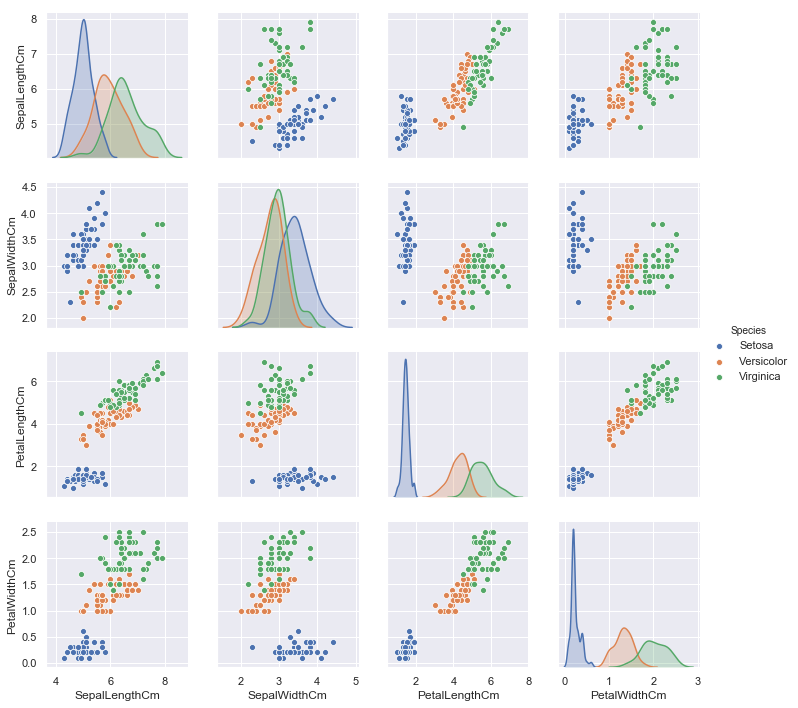

In [64]:
sns.set()
sns.pairplot(iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']],hue="Species", diag_kind="kde")
plt.show()

In [65]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
iris_data['Species'] = labelencoder.fit_transform(iris_data['Species'].astype('str'))
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [66]:
iris_data['Species'].unique()

array([0, 1, 2])

In [67]:
X = iris_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = iris_data['Species']

In [70]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=101)

In [72]:
print('Number of observations in the training data:', len(X_train))
print('Number of observations in the test data:',len(X_test))

Number of observations in the training data: 105
Number of observations in the test data: 45


In [73]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [74]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0,
       1, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 2,
       1])

In [75]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [76]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9777777777777777


In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.95      0.97        20
           2       0.92      1.00      0.96        12

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Итого: 
- модель логистической регрессии дала 100%
- модель ансамбля дала 97%

Вывод: Логистической регрессии дала наиболее точное предсказание для данного dataset

In [ ]:
pass